In [1]:
# imports

import os
import sys
import networkx as nx
from pycausal.pycausal import pycausal

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
aitia = App()

In [3]:
feature_selection_list = []
feature_selection_list.append(aitia.feature_selection.LINEAR_REGRESSION)
feature_selection_list.append(aitia.feature_selection.PRINCIPAL_FEATURE_ANALYSIS)
feature_selection_list.append(aitia.feature_selection.RANDOM_FOREST)
feature_selection_list.append(aitia.feature_selection.RECURSIVE_FEATURE_ELIMINATION)
feature_selection_list.append(aitia.feature_selection.XGBOOST)

In [4]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)
algorithm_list.append(aitia.algo_runner.FGES_continuous)
algorithm_list.append(aitia.algo_runner.GFCI_continuous)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [5]:
pc = pycausal()
pc.start_vm()

In [6]:
hepar2_df = aitia.data.hepar2_100_data()

In [8]:
target_str_dot = aitia.data.hepar2_graph()

In [9]:
results, summary = aitia.run_analysis( hepar2_df,
                                       target_graph_str=target_str_dot,
                                       n_features=10,
                                       feature_selection_list=feature_selection_list,
                                       algorithm_list=algorithm_list,
                                       pc=pc)

Running causal discovery on features selected by LINEAR_REGRESSION
Running causal discovery using PC
Running causal discovery using FCI
Running causal discovery using FGES-continuous
Running causal discovery using GFCI-continuous
Running causal discovery using RFCI-continuous
Completed causal discovery.
Running causal discovery on features selected by PRINCIPAL_FEATURE_ANALYSIS
Running causal discovery using PC
Running causal discovery using FCI
Running causal discovery using FGES-continuous
Running causal discovery using GFCI-continuous
Running causal discovery using RFCI-continuous
Completed causal discovery.
Running causal discovery on features selected by RANDOM_FOREST
Running causal discovery using PC
Running causal discovery using FCI
Running causal discovery using FGES-continuous
Running causal discovery using GFCI-continuous
Running causal discovery using RFCI-continuous
Completed causal discovery.
Running causal discovery on features selected by RECURSIVE_FEATURE_ELIMINATION
R

In [10]:
from IPython.display import display, HTML

display(HTML(summary.to_html()))

,causal algorithm,feature selection method,AUPR,SHD
0,PC,LINEAR_REGRESSION,0.044292,139.0
1,FCI,LINEAR_REGRESSION,0.044292,139.0
2,FGES-continuous,LINEAR_REGRESSION,0.516514,122.0
3,GFCI-continuous,LINEAR_REGRESSION,0.516514,122.0
4,RFCI-continuous,LINEAR_REGRESSION,0.044292,139.0
5,PC,PRINCIPAL_FEATURE_ANALYSIS,0.012551,125.0
6,FCI,PRINCIPAL_FEATURE_ANALYSIS,0.012551,124.0
7,FGES-continuous,PRINCIPAL_FEATURE_ANALYSIS,0.012551,125.0
8,GFCI-continuous,PRINCIPAL_FEATURE_ANALYSIS,0.012551,125.0
9,RFCI-continuous,PRINCIPAL_FEATURE_ANALYSIS,0.012551,124.0


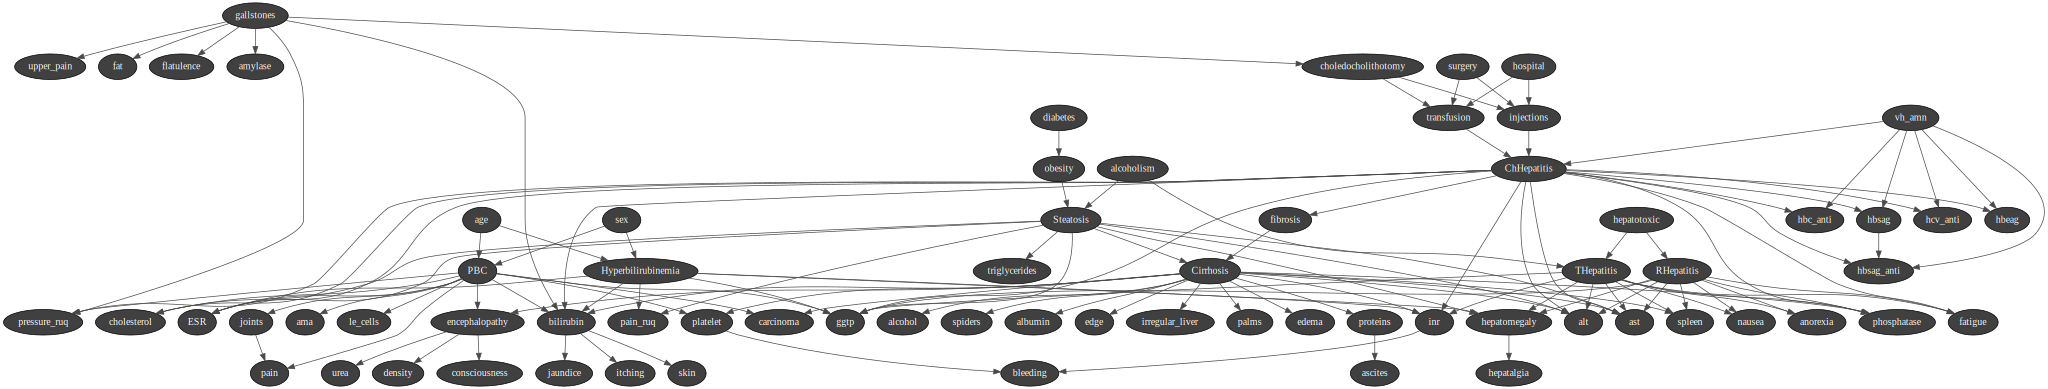

In [12]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
bn1 = gum.loadBN("/home/seamus/GitHub/aitiaexplorer/src/aitia_explorer/target_data/graphs/hepar2.bif")
gnb.showBN(bn,size='30')

In [53]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
cmg = results[0].causal_graph

In [54]:
cmg.dag.edges()

OutEdgeView([('hcv_anti', 'upper_pain'), ('hcv_anti', 'hepatomegaly'), ('hcv_anti', 'surgery'), ('hcv_anti', 'palms'), ('hcv_anti', 'vh_amn'), ('hbeag', 'hcv_anti'), ('hbeag', 'upper_pain'), ('hbeag', 'hepatomegaly'), ('hbeag', 'surgery'), ('hbeag', 'palms'), ('hbeag', 'vh_amn'), ('fibrosis', 'hcv_anti'), ('fibrosis', 'hbeag'), ('Steatosis', 'hcv_anti'), ('Steatosis', 'hbeag'), ('Steatosis', 'hepatomegaly'), ('PBC', 'hcv_anti'), ('PBC', 'hbeag')])

In [55]:
bn = gum.BayesNet()

In [56]:
for node in cmg.dag.nodes():
    print(node)
    bn.add(gum.LabelizedVariable(node, "", 2))

hcv_anti
upper_pain
hbeag
hepatomegaly
fibrosis
Steatosis
surgery
PBC
palms
vh_amn


In [57]:
for edge in cmg.dag.edges():
    bn.addArc(edge[0], edge[1])

In [58]:
bn

(gum::BayesNet<double>@0x5563d6d10200) BN{nodes: 10, arcs: 18, domainSize: 1024, dim: 102}

In [60]:
gnb.sideBySide(bn,bn2,gnb.getBNDiff(bn,bn2),
              captions=['target','learned BN','graphical diffs between target and learned'])

Exception: [pyAgrum] several evidence/CPT are incompatible together (proba=0): some evidence entered into the Bayes net are incompatible (their joint proba = 0)